<a href="https://colab.research.google.com/github/segnig/Kaggle-Competitions/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
FILE_PATH = "/content/drive/MyDrive/Data Science/titanic/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [4]:
train_data = pd.read_csv(FILE_PATH + "train.csv")
test_data = pd.read_csv(FILE_PATH + "test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def plot_ratio_of_survived(feature):
    train_data.groupby(feature)["Survived"].mean().plot(kind="bar", color=["blue", "orange", "green", "red", "purple", "brown"])

    # Set title and axis labels
    plt.title(f"Survival Rate by {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Survival Rate")

    # Show the plot
    plt.show()


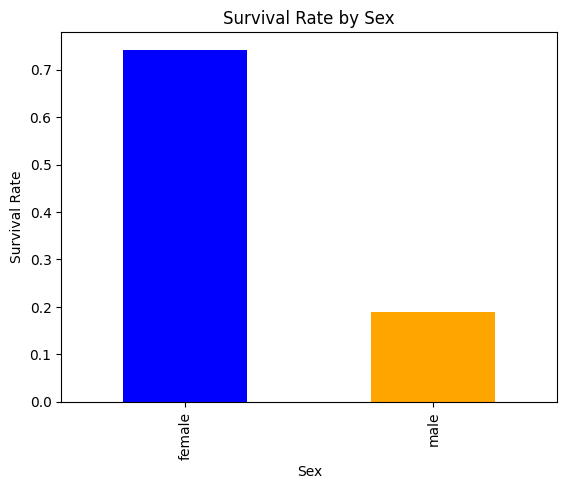

In [7]:
plot_ratio_of_survived("Sex")

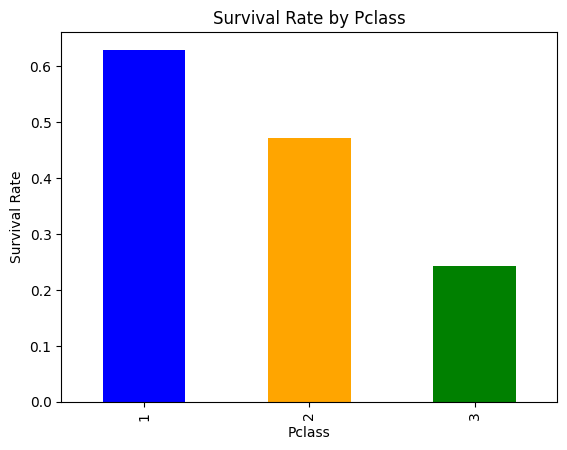

In [8]:
plot_ratio_of_survived("Pclass")

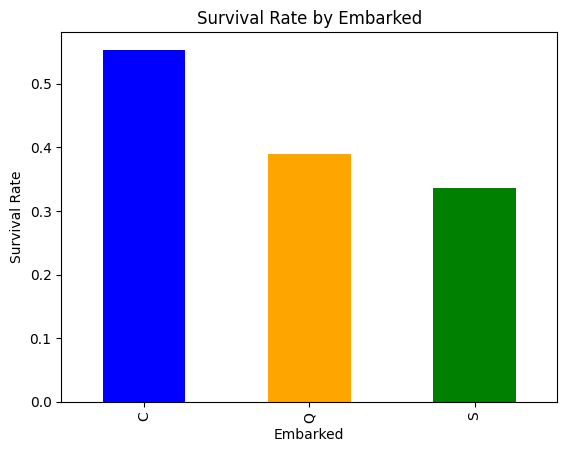

In [9]:
plot_ratio_of_survived("Embarked")

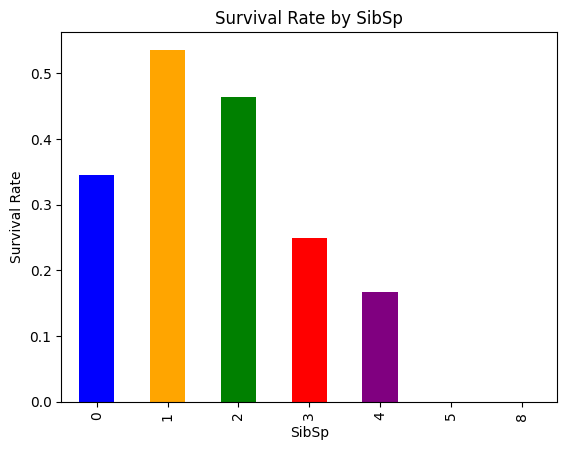

In [10]:
plot_ratio_of_survived("SibSp")

# `Feature Engineering`

In [21]:
train_data["title"] = train_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(train_data["title"].value_counts())

test_data["title"] = test_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(test_data["title"].value_counts())

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [22]:
# mapping the

def title_mapping(title):
    if title in ["Mr", "Don", "Rev", "Dr", "Major", "Col"]:
        return "Mr"
    elif title in ["Ms", "Mlle", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title in ["Master"]:
        return "Master"
    else:
        return "Other"

train_data["title"] = train_data["title"].apply(title_mapping)
test_data["title"] = test_data["title"].apply(title_mapping)

In [23]:
print(train_data["title"].value_counts())
print(test_data["title"].value_counts())

title
Mr        535
Miss      185
Mrs       126
Master     40
Other       5
Name: count, dtype: int64
title
Mr        245
Miss       79
Mrs        72
Master     21
Other       1
Name: count, dtype: int64


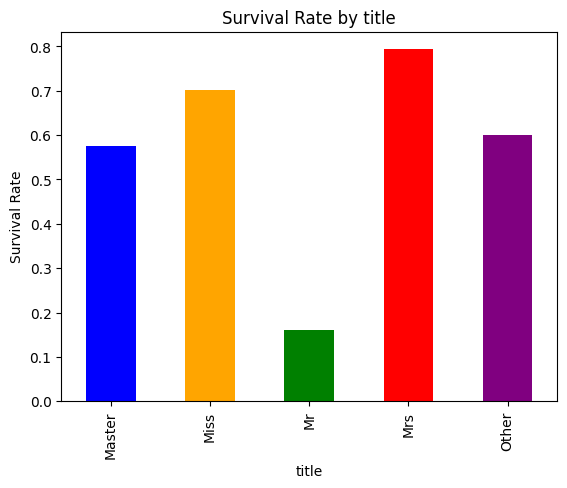

In [25]:
# the survived rate.
plot_ratio_of_survived("title")

In [26]:
# Missing value
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
# Filling values age by title
# train
train_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

# test
test_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

In [41]:
# Cabin feature groupped by `null` and `notnull`
train_data["Cabin"] = train_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

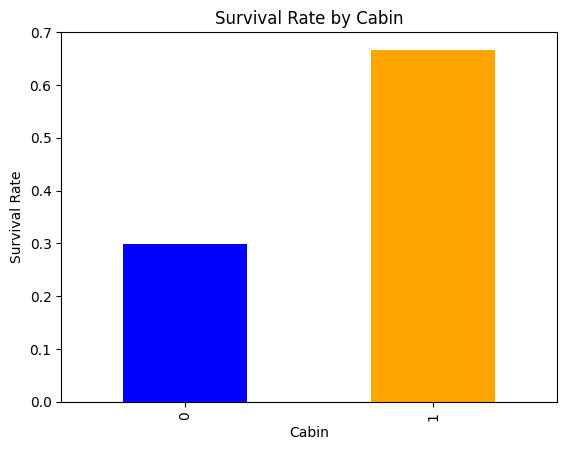

In [42]:
# ratio of survived
plot_ratio_of_survived("Cabin")

In [43]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [45]:
test_data["Cabin"] = train_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [46]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,0


In [48]:
# missing values Fare by Pclass

train_data["Fare"] = train_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))
test_data["Fare"] = train_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))


In [49]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [50]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [52]:
train_data["Embarked"] = train_data.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [53]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [54]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"]

test_data["isAlone"] = train_data["FamilySize"].apply(lambda x: 1 if x == 0 else 0)
train_data["isAlone"] = train_data["FamilySize"].apply(lambda x: 1 if x == 0 else 0)


# Age

In [55]:
def plot_kde_age(min, max):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=train_data[(train_data["Age"] >= min) & (train_data["Age"] <= max)], x="Age", fill=True, ax=ax, hue="Survived")



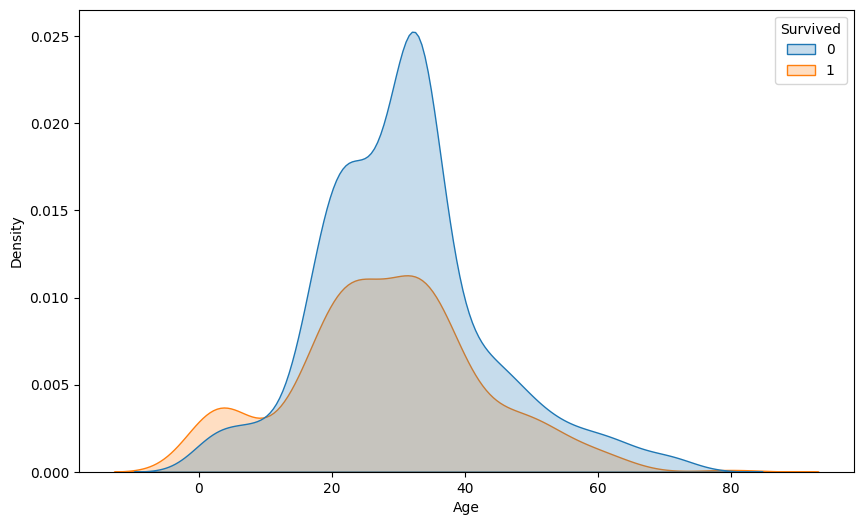

In [58]:
plot_kde_age(0, 100)